<a href="https://colab.research.google.com/github/CabeludoCego/SistEvolutivos/blob/main/Enviado_AAC3_Prog_Evolutiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarefa 3: Programação evolutiva em representação real
Descrição do Problema

Aluno: Lucas Lemos Carvalho Batista


**ESPECIFICAÇÕES**

> 
> 
>
> 

> Esta atividade é individual.

> Além do código, o aluno deverá apresentar um pequeno relatório com detalhamento das soluções.

> Representação dos cromossomos: cadeia binária de tamanho 20 por variável.

> Parâmetros:
- Seleção: roleta.
- Taxa de mutação: 100%
- Tamanho da população: n = 200
- Critério de parada: 50 gerações.

- (!) A nova população serão os melhores N = 200 indivíduos após um processo de Seleção entre Pais e Filhos.

**PROBLEMAS**

> Problema 1: Rastrigin
- nx = 4 

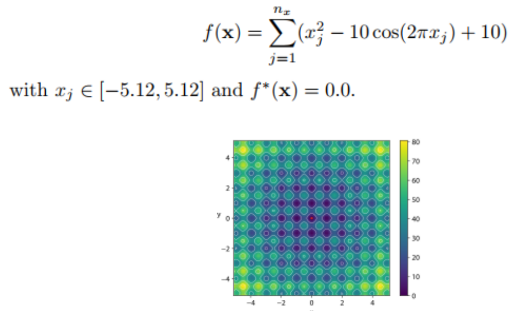

> Problema 2: Ackley
- nx = 4

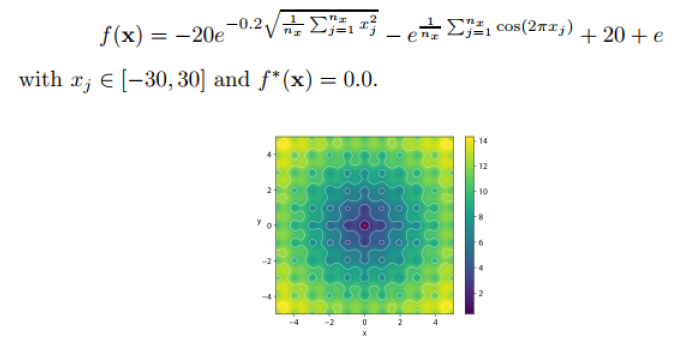

> Problema 3: Rosenbrock
- nx = 4 

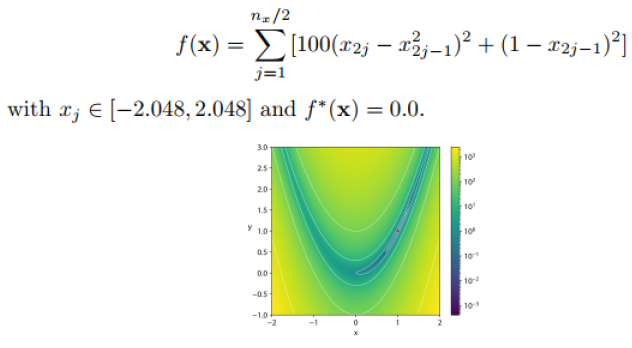

> Problema 4: Easom
nx = 2

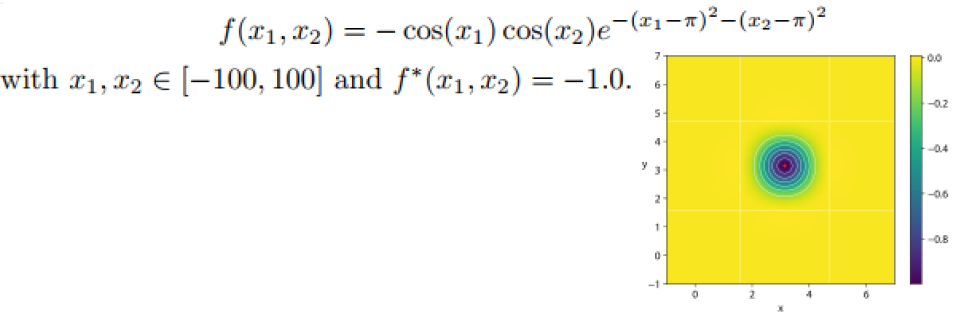

# Funções Editadas - Prog Evolutiva


In [60]:
import pandas as pd
import matplotlib as plt
import numpy as np
import random as U
import math
# import random as rnd

**Funções a manusear**

In [61]:
## Rastrigin

# Nx = 4 -> Problema de 4 Dimensões
# X = Vetor de 80 bits, 20 por dimensão

pi = np.pi
# Passar saida do Xj_divide
def aux(x): 
    valor = ((x)**2) - 10*np.cos(2*pi*x) + 10
    return valor

def rastrigin(X):
  # Recebe valor real e calcula o eq de Rastrigin
  f = 0
  for i in range (nx):
    X1 = X[i]
    f = f + aux(X1)
    #print(f)

  return f

In [62]:
## Ackley

# Nx = 4 -> Problema de 4 Dimensões
# X = Vetor de 80 bits, 20 por dimensão
pi = np.pi
cos = np.cos
# Passar saida do Xj_divide
#def aux1(x): # inclui soma 
 #   valor = sum((X)**2)
  #  return valor
def aux2(X): 
  valor = 0
  b = 0
  for b in range(nx):
    valor = valor + (np.cos(2*pi*X[b]))
  return valor

def ackley(X):
  # Recebe valor real e calcula o eq de Ackley
  f = 0
  aux = aux2(X)
  f = -20*np.exp(-0.2*np.sqrt(sum((X)**2)/nx)) - np.exp(aux/nx) + 20 + np.exp(1)
  return f

In [63]:
## Rosenbrock

# Nx = 4 -> Problema de 4 Dimensões
# X = Vetor de 80 bits, 20 por dimensão
# nx = 4
pi = np.pi
cos = np.cos

def rosenbrock(X):
  # Recebe valor real e calcula
  f = 0
  i = 0
  while (i < nx/2):
    X1 = X[i]
    X2 = X[i+1]
    f = f + (100*((X2-(X1**2))**2) + ((1-X1)**2))
    i = i + 2
  return f

In [64]:
## Easom

# Nx = 2 -> Problema de 2 Dimensões
# X = Vetor de 40 bits, 20 por dimensão
# nx = 2
pi = np.pi
cos = np.cos

def easom(X):
  # Recebe valor real e calcula
  f = 0
  X1 = X[0]
  X2 = X[1]
  f = -np.cos(X1)*cos(X2)*np.exp(-((X1-pi)**2)-((X2-pi)**2)) 
  return f

**Funções essenciais**

In [65]:
# supoe maximização e fitness normalizados

def roleta2(pop, Vprob_esc):
  # i = Índice
  i = 0
  soma = Vprob_esc[i]
  r = U.random()
  while soma < r:
    i = i + 1
    if (i >= pop):
      i = i - 1
      break
    soma = soma + Vprob_esc[i,:]

  return i

In [66]:
# Criar população já real. Como fazer: 

def criarpop(vetor, pop):
  i = 0
  for i in range(pop):                 # Cria-se um indivíduo por vez
    #n = (np.random.rand(1,nx))         # Vetor randômico de números, entre 0 e 1
    nr = (np.random.uniform(minB,maxB,nx))         # Vetor randômico de números, entre 0 e 1
    
    # nr = 2*maxB*n + minB
    
    vetor[i,:] = nr[:]  

In [67]:
def calculafit(vetor_real, vetor_fit, pop):
  i = 0
  for i in range(pop):
    X = vetor_real[i,:]  # Valores de X correspondentes reais
    Fx = rastrigin(X)    # Calcula a imagem Y de X
    vetor_fit[i] = Fx    # Aloca o valor da função no vetor de Fitness
  

In [68]:
# Versão funcional

def sortir_vetores(vetor_fit, vetor_fit_s,
                   vetor_real, vetor_realS):
  
  indices = np.argsort(vetor_fit, axis=0)

  i = 0
  while i < pop:
    vetor_fit_s[i] = vetor_fit[indices[i]]
    vetor_realS[i,:] = vetor_real[indices[i],:]
    i = i + 1

In [69]:
def mutacao_PE(Individuo, Filho, Lider):
  # Testar: Cauchy, Lévy, Exponencial.
  
  # rm = (np.random.rand(1,1))
  rm = np.random.uniform(-1, 1)
  delta = rm*(Lider - Individuo)

  Filho = Individuo + delta
  return Filho

In [70]:
def sortir_grupoCompetidor(vetor_fit, vetor_fit_s,
                           vetor_real, vetor_realS,
                           vetor_relativo, vetor_relativo_S):
  
  indices = np.argsort(vetor_relativo, axis=0)

  i = 0
  while i < 2*pop:
    vetor_relativo_S[i] = vetor_relativo[indices[i]]
    vetor_fit_s[i] = vetor_fit[indices[i]]
    vetor_realS[i,:] = vetor_real[indices[i],:]
    i = i + 1

In [71]:
def selecao(fitness_S, vetor_prob, pop):
  # Etapa 1: Obter fitness escalonada e fit. esc. reversa
  maxfit = np.amax(fitness_S)  # Maior fitness
  fit_esc = fitness_S/maxfit   # Vetor de fitness escalonadas, com base no sortido
  rev_fitesc = (1/fit_esc)    # Fitness ordenada escalonada/1
  sum_revfitesc = np.sum(rev_fitesc, axis=0)

  # Definir probabilidades de acordo quão menor for a fitness
  i = 0
  for i in range(pop):
  # Usando escalonada para pegar porcentagem
    val = rev_fitesc[i]/sum_revfitesc
    vetor_prob[i] = val
  
  
  i_selecionados = np.zeros((pop,1), dtype=int)
  # Realizar a roleta de acordo com a prob para escolher os pares
  k=0
  for k in range (pop):
    Xi = roleta2(pop,vetor_prob)
    i_selecionados[k] = Xi
    # Xi é um índice de vetor_bin_S

    # selecionados[k] = vt_s[Xi,:]

  return i_selecionados

# Questão 01 - 3: Rastrigin evolutivo em loop


In [72]:
# Detalhes do problema
pop = 200
Max_gen = 50
nx = 4

# Limites do problema
minB = -5.12
maxB = 5.12

# Variáveis do vetor real

vt_real = np.zeros((pop, nx), dtype=float)
fitness = np.zeros((pop,1), dtype=float)

vt_real_S = np.zeros((pop, nx), dtype=float)
fitness_S = np.zeros((pop,1), dtype=float)

filhos = np.ones((pop, nx), dtype=float)
filhos_fit = np.ones((pop, 1), dtype=float)
filhos_s = np.ones((pop, nx), dtype=float)
filhos_fitS = np.ones((pop,1), dtype=float)

# Variáveis para a Seleção relativa
clubeSize = int(0.4*pop)

grupoCompetidor = np.zeros((2*pop,nx), dtype=float)
fit_compet = np.zeros((2*pop,1), dtype=float)
grupoCompetidor_S = np.zeros((2*pop,nx), dtype=float)
fit_compet_S = np.zeros((2*pop,1), dtype=float)

fit_relativa = np.zeros((2*pop, 1), dtype=int)
fit_relativa_S = np.zeros((2*pop, 1), dtype=int)

clubeDaLuta = np.zeros((clubeSize,1), dtype=float)

novagen = np.zeros((pop,4), dtype=float)


In [73]:
def calculafit(vetor_real, vetor_fit, pop):
  i = 0
  for i in range(pop):
    X = vetor_real[i,:]  # Valores de X correspondentes reais
    Fx = rastrigin(X)    # Calcula a imagem Y de X
    #d = np.sqrt((Fx - (0))**2)

    vetor_fit[i] = Fx    # Aloca o valor da função no vetor de Fitness

In [74]:
# Criação de indivíduos
seed = 100*round(U.random())

criarpop(vt_real, pop)
# Mostrar primeiros elementos do vetor para indicar que deu certo
# print(vt_real)

In [75]:
gen = 0
while gen < Max_gen:
  # Etapa 1.5: Verificar fitness dos criados para definir um "melhor indivíduo"

  calculafit(vt_real,fitness,pop)
  sortir_vetores(fitness,fitness_S, vt_real, vt_real_S)

  Lider = vt_real_S[0,:]

  # Etapa 2: Realizar a mutação da população
  i = 0
  while i < pop:
    filhos[i,:] = mutacao_PE(vt_real[i,:], filhos[i,:], Lider)
    i = i + 1

  # Etapa 3: Avaliar indivíduos gerados pela mutação (nem precisa)
  calculafit(filhos, filhos_fit, pop)
    
  sortir_vetores(filhos_fit, filhos_fitS, filhos, filhos_s)

  # Etapa 4: Evaluação relativa
  # Inicialmente unir Pais e Filhos num só grupo

  # Unir pais e filhos no vetor GrupoCompetidor
  i = 0
  for i in range(2*pop):                 # Alocar todos de vt_real
    if i < pop:
      nr = vt_real_S[i,:]     
    if i >= pop:
      nr = filhos_s[i-pop,:]            # Mantém i em pop+, indice em i 
    grupoCompetidor[i,:] = nr[:]  

  calculafit(grupoCompetidor, fit_compet, 2*pop)

  # Evaluação de fato
  # Calcular a Fitness relativa, gerando comparações em grupos
  i = 0
  while i < 2*pop:            # Roda todo o vetor de grupoCompetidor
    Lutador = fit_compet[i]   # Um a um, escolhe quem será comparado
    inds = U.sample(range(0,pop),clubeSize) # Coleta indices inteiros randomicos
    q = 0 
    while q < clubeSize:
      clubeDaLuta[q] = fit_compet[inds[q]] # Aloca os indices em um grupo menor
      q = q + 1
    SomaVitorias = 0
    q = 0
    while q < clubeSize:              # E compara o "Lutador" com o grupo menor, um a um
      if (Lutador > clubeDaLuta[q]):
        SomaVitorias = SomaVitorias + 1
      q = q + 1

    fit_relativa[i] = SomaVitorias
    i = i + 1

  # Etapa 5: Seleção
  # Sortir e preparar para realizar a real seleção
  sortir_grupoCompetidor(fit_compet,fit_compet_S, grupoCompetidor, grupoCompetidor_S,fit_relativa,fit_relativa_S)

  Competprob = np.zeros((2*pop,1), dtype=float)


  iselec = selecao(fit_compet_S, Competprob ,2*pop) # Por roleta!

  # Etapa 5.5: Pós Seleção, definir os melhores selecionados
  # Definir nova geração
  i = 0
  while i < pop:
    novagen[i,:] = grupoCompetidor_S[iselec[i]]
    i = i + 1 
  
  # Reinicia o ciclo
  vt_real = novagen
  #print(fitness_S[0])

  gen = gen + 1


In [76]:
X = novagen[0,:]  # Valores de X correspondentes reais
Fx = rastrigin(X)    # Calcula a imagem Y de X

print(Fx)

2.9849882552223796


# Questão 02 - 3: Ackley evolutivo em loop


In [77]:
# Detalhes do problema
pop = 200
Max_gen = 50
nx = 4

# Limites do problema
minB = -30
maxB = 30

# Variáveis do vetor real

vt_real = np.zeros((pop, nx), dtype=float)
fitness = np.zeros((pop,1), dtype=float)

vt_real_S = np.zeros((pop, nx), dtype=float)
fitness_S = np.zeros((pop,1), dtype=float)

filhos = np.ones((pop, nx), dtype=float)
filhos_fit = np.ones((pop, 1), dtype=float)
filhos_s = np.ones((pop, nx), dtype=float)
filhos_fitS = np.ones((pop,1), dtype=float)

# Variáveis para a Seleção relativa
clubeSize = int(0.4*pop)

grupoCompetidor = np.zeros((2*pop,nx), dtype=float)
fit_compet = np.zeros((2*pop,1), dtype=float)
grupoCompetidor_S = np.zeros((2*pop,nx), dtype=float)
fit_compet_S = np.zeros((2*pop,1), dtype=float)

fit_relativa = np.zeros((2*pop, 1), dtype=int)
fit_relativa_S = np.zeros((2*pop, 1), dtype=int)

clubeDaLuta = np.zeros((clubeSize,1), dtype=float)

novagen = np.zeros((pop,4), dtype=float)


In [78]:
def calculafit(vetor_real, vetor_fit, pop):
  i = 0
  for i in range(pop):
    X = vetor_real[i,:]  # Valores de X correspondentes reais
    Fx = ackley(X)    # Calcula a imagem Y de X
    #d = np.sqrt((Fx - (0))**2)

    vetor_fit[i] = Fx    # Aloca o valor da função no vetor de Fitness

In [79]:
# Criação de indivíduos
seed = 100*round(U.random())

criarpop(vt_real, pop)
# Mostrar primeiros elementos do vetor para indicar que deu certo
# print(vt_real)

In [80]:
gen = 0
while gen < Max_gen:
  # Etapa 1.5: Verificar fitness dos criados

  calculafit(vt_real,fitness,pop)
  sortir_vetores(fitness,fitness_S, vt_real, vt_real_S)

  Lider = vt_real_S[0,:]

  # Etapa 2: Realizar a mutação da população
  i = 0
  while i < pop:
    filhos[i,:] = mutacao_PE(vt_real[i,:], filhos[i,:], Lider)
    i = i + 1

  # Etapa 3: Avaliar indivíduos gerados pela mutação (nem precisa)
  calculafit(filhos, filhos_fit, pop)
    
  sortir_vetores(filhos_fit, filhos_fitS, filhos, filhos_s)

  # Etapa 4: Seleção relativa, o Grupo Competidor

  # Unir pais e filhos no vetor GrupoCompetidor
  i = 0
  for i in range(2*pop):                 # Alocar todos de vt_real
    if i < pop:
      nr = vt_real_S[i,:]     
    if i >= pop:
      nr = filhos_s[i-pop,:]            # Mantém i em 30+, indice em i 
    grupoCompetidor[i,:] = nr[:]  

  calculafit(grupoCompetidor, fit_compet, 2*pop)


  # Calcular a Fitness relativa, gerando comparações em grupos
  i = 0
  while i < 2*pop:            # Roda todo o vetor de grupoCompetidor
    Lutador = fit_compet[i]   # Um a um, escolhe quem será comparado
    inds = U.sample(range(0,pop),clubeSize) # Coleta indices inteiros randomicos
    q = 0 
    while q < clubeSize:
      clubeDaLuta[q] = fit_compet[inds[q]] # Aloca os indices em um grupo menor
      q = q + 1
    SomaVitorias = 0
    q = 0
    while q < clubeSize:              # E compara o "Lutador" com o grupo menor, um a um
      if (Lutador > clubeDaLuta[q]):
        SomaVitorias = SomaVitorias + 1
      q = q + 1

    fit_relativa[i] = SomaVitorias
    i = i + 1


  # Sortir e preparar para realizar a real seleção
  sortir_grupoCompetidor(fit_compet,fit_compet_S, grupoCompetidor, grupoCompetidor_S,fit_relativa,fit_relativa_S)

  Competprob = np.zeros((2*pop,1), dtype=float)


  iselec = selecao(fit_compet_S, Competprob ,2*pop) # Por roleta!

  # Definir nova geração
  i = 0
  while i < pop:
    novagen[i,:] = grupoCompetidor_S[iselec[i]]
    i = i + 1 
  
  # Reinicia o ciclo
  vt_real = novagen
  #print(fitness_S[0])

  gen = gen + 1


In [81]:
X = novagen[0,:]  # Valores de X correspondentes reais
Fx = ackley(X)    # Calcula a imagem Y de X

print(Fx)

3.419354032732422


# Questão 03- 3: Rosenbrock evolutivo em loop


In [82]:
# Detalhes do problema
pop = 200
Max_gen = 50
nx = 4    

# Limites do problema
minB = -2.048
maxB = 2.048

# Variáveis do vetor real

vt_real = np.zeros((pop, nx), dtype=float)
fitness = np.zeros((pop,1), dtype=float)

vt_real_S = np.zeros((pop, nx), dtype=float)
fitness_S = np.zeros((pop,1), dtype=float)

filhos = np.ones((pop, nx), dtype=float)
filhos_fit = np.ones((pop, 1), dtype=float)
filhos_s = np.ones((pop, nx), dtype=float)
filhos_fitS = np.ones((pop,1), dtype=float)

# Variáveis para a Seleção relativa
clubeSize = int(0.4*pop)

grupoCompetidor = np.zeros((2*pop,nx), dtype=float)
fit_compet = np.zeros((2*pop,1), dtype=float)
grupoCompetidor_S = np.zeros((2*pop,nx), dtype=float)
fit_compet_S = np.zeros((2*pop,1), dtype=float)

fit_relativa = np.zeros((2*pop, 1), dtype=int)
fit_relativa_S = np.zeros((2*pop, 1), dtype=int)

clubeDaLuta = np.zeros((clubeSize,1), dtype=float)

novagen = np.zeros((pop,4), dtype=float)


In [83]:
def calculafit(vetor_real, vetor_fit, pop):
  i = 0
  for i in range(pop):
    X = vetor_real[i,:]  # Valores de X correspondentes reais
    Fx = rosenbrock(X)    # Calcula a imagem Y de X
    #d = np.sqrt((Fx - (0))**2)

    vetor_fit[i] = Fx    # Aloca o valor da função no vetor de Fitness

In [84]:
# Criação de indivíduos
seed = 100*round(U.random())

criarpop(vt_real, pop)
# Mostrar primeiros elementos do vetor para indicar que deu certo
# print(vt_real)

In [85]:
gen = 0
while gen < Max_gen:
  # Etapa 1.5: Verificar fitness dos criados

  calculafit(vt_real,fitness,pop)
  sortir_vetores(fitness,fitness_S, vt_real, vt_real_S)

  Lider = vt_real_S[0,:]

  # Etapa 2: Realizar a mutação da população
  i = 0
  while i < pop:
    filhos[i,:] = mutacao_PE(vt_real[i,:], filhos[i,:], Lider)
    i = i + 1

  # Etapa 3: Avaliar indivíduos gerados pela mutação (nem precisa)
  calculafit(filhos, filhos_fit, pop)
    
  sortir_vetores(filhos_fit, filhos_fitS, filhos, filhos_s)

  # Etapa 4: Seleção relativa, o Grupo Competidor

  # Unir pais e filhos no vetor GrupoCompetidor
  i = 0
  for i in range(2*pop):                 # Alocar todos de vt_real
    if i < pop:
      nr = vt_real_S[i,:]     
    if i >= pop:
      nr = filhos_s[i-pop,:]            # Mantém i em 30+, indice em i 
    grupoCompetidor[i,:] = nr[:]  

  calculafit(grupoCompetidor, fit_compet, 2*pop)


  # Calcular a Fitness relativa, gerando comparações em grupos
  i = 0
  while i < 2*pop:            # Roda todo o vetor de grupoCompetidor
    Lutador = fit_compet[i]   # Um a um, escolhe quem será comparado
    inds = U.sample(range(0,pop),clubeSize) # Coleta indices inteiros randomicos
    q = 0 
    while q < clubeSize:
      clubeDaLuta[q] = fit_compet[inds[q]] # Aloca os indices em um grupo menor
      q = q + 1
    SomaVitorias = 0
    q = 0
    while q < clubeSize:              # E compara o "Lutador" com o grupo menor, um a um
      if (Lutador > clubeDaLuta[q]):
        SomaVitorias = SomaVitorias + 1
      q = q + 1

    fit_relativa[i] = SomaVitorias
    i = i + 1


  # Sortir e preparar para realizar a real seleção
  sortir_grupoCompetidor(fit_compet,fit_compet_S, grupoCompetidor, grupoCompetidor_S,fit_relativa,fit_relativa_S)

  Competprob = np.zeros((2*pop,1), dtype=float)


  iselec = selecao(fit_compet_S, Competprob ,2*pop) # Por roleta!

  # Definir nova geração
  i = 0
  while i < pop:
    novagen[i,:] = grupoCompetidor_S[iselec[i]]
    i = i + 1 
  
  # Reinicia o ciclo
  vt_real = novagen
  #print(fitness_S[0])

  gen = gen + 1


In [86]:
X = novagen[0,:]  # Valores de X correspondentes reais
Fx = rosenbrock(X)    # Calcula a imagem Y de X

print(Fx)

0.013299159027881745


# Questão 04- 3: Easom evolutivo em loop


In [87]:
# Detalhes do problema
pop = 200
Max_gen = 50
nx = 2

# Limites do problema
minB = -100
maxB = 100

# Variáveis do vetor real

vt_real = np.zeros((pop, nx), dtype=float)
fitness = np.zeros((pop,1), dtype=float)

vt_real_S = np.zeros((pop, nx), dtype=float)
fitness_S = np.zeros((pop,1), dtype=float)

filhos = np.ones((pop, nx), dtype=float)
filhos_fit = np.ones((pop, 1), dtype=float)
filhos_s = np.ones((pop, nx), dtype=float)
filhos_fitS = np.ones((pop,1), dtype=float)

# Variáveis para a Seleção relativa
clubeSize = int(0.4*pop)

grupoCompetidor = np.zeros((2*pop,nx), dtype=float)
fit_compet = np.zeros((2*pop,1), dtype=float)
grupoCompetidor_S = np.zeros((2*pop,nx), dtype=float)
fit_compet_S = np.zeros((2*pop,1), dtype=float)

fit_relativa = np.zeros((2*pop, 1), dtype=int)
fit_relativa_S = np.zeros((2*pop, 1), dtype=int)

clubeDaLuta = np.zeros((clubeSize,1), dtype=float)

novagen = np.zeros((pop,nx), dtype=float)


In [88]:
def calculafit(vetor_real, vetor_fit, pop):
  i = 0
  for i in range(pop):
    X = vetor_real[i,:]  # Valores de X correspondentes reais
    Fx = easom(X)    # Calcula a imagem Y de X
    #d = np.sqrt((Fx - (0))**2)

    vetor_fit[i] = Fx    # Aloca o valor da função no vetor de Fitness

In [89]:
# Criação de indivíduos
seed = 100*round(U.random())

criarpop(vt_real, pop)
# Mostrar primeiros elementos do vetor para indicar que deu certo
# print(vt_real)

In [90]:
gen = 0
while gen < Max_gen:
  # Etapa 1.5: Verificar fitness dos criados

  calculafit(vt_real,fitness,pop)
  sortir_vetores(fitness,fitness_S, vt_real, vt_real_S)

  Lider = vt_real_S[0,:]

  # Etapa 2: Realizar a mutação da população
  i = 0
  while i < pop:
    filhos[i,:] = mutacao_PE(vt_real[i,:], filhos[i,:], Lider)
    i = i + 1

  # Etapa 3: Avaliar indivíduos gerados pela mutação (nem precisa)
  calculafit(filhos, filhos_fit, pop)
    
  sortir_vetores(filhos_fit, filhos_fitS, filhos, filhos_s)

  # Etapa 4: Seleção relativa, o Grupo Competidor

  # Unir pais e filhos no vetor GrupoCompetidor
  i = 0
  for i in range(2*pop):                 # Alocar todos de vt_real
    if i < pop:
      nr = vt_real_S[i,:]     
    if i >= pop:
      nr = filhos_s[i-pop,:]            # Mantém i em 30+, indice em i 
    grupoCompetidor[i,:] = nr[:]  

  calculafit(grupoCompetidor, fit_compet, 2*pop)


  # Calcular a Fitness relativa, gerando comparações em grupos
  i = 0
  while i < 2*pop:            # Roda todo o vetor de grupoCompetidor
    Lutador = fit_compet[i]   # Um a um, escolhe quem será comparado
    inds = U.sample(range(0,pop),clubeSize) # Coleta indices inteiros randomicos
    q = 0 
    while q < clubeSize:
      clubeDaLuta[q] = fit_compet[inds[q]] # Aloca os indices em um grupo menor
      q = q + 1
    SomaVitorias = 0
    q = 0
    while q < clubeSize:              # E compara o "Lutador" com o grupo menor, um a um
      if (Lutador > clubeDaLuta[q]):
        SomaVitorias = SomaVitorias + 1
      q = q + 1

    fit_relativa[i] = SomaVitorias
    i = i + 1


  # Sortir e preparar para realizar a real seleção
  sortir_grupoCompetidor(fit_compet,fit_compet_S, grupoCompetidor, grupoCompetidor_S,fit_relativa,fit_relativa_S)

  Competprob = np.zeros((2*pop,1), dtype=float)


  iselec = selecao(fit_compet_S, Competprob ,2*pop) # Por roleta!

  # Definir nova geração
  i = 0
  while i < pop:
    novagen[i,:] = grupoCompetidor_S[iselec[i]]
    i = i + 1 
  
  # Reinicia o ciclo
  vt_real = novagen
  #print(fitness_S[0])

  gen = gen + 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [91]:
X = novagen[0,:]  # Valores de X correspondentes reais
Fx = easom(X)    # Calcula a imagem Y de X

print(Fx)

-6.948732529107933e-35


# Questão 01 - Deprecado: Rastrigin evolutivo


In [25]:
# Detalhes do problema
pop = 40
Max_gen = 500
Px = 0.9
Pm = 0.02
nx = 4

# Limites do problema
minB = -5.12
maxB = 5.12

vt_real = np.zeros((pop, nx), dtype=float)
fitness = np.zeros((pop,1), dtype=float)

vt_real_S = np.zeros((pop, nx), dtype=float)
fitness_S = np.zeros((pop,1), dtype=float)

filhos = np.ones((pop, nx), dtype=float)
filhos_fit = np.ones((pop, 1), dtype=float)
filhos_s = np.ones((pop, nx), dtype=float)
filhos_fitS = np.ones((pop,1), dtype=float)

fit_compet = np.zeros((2*pop,1), dtype=float)
fit_relativa = np.zeros((2*pop, 1), dtype=float)


In [26]:
def calculafit(vetor_real, vetor_fit, pop):
  i = 0
  for i in range(pop):
    X = vetor_real[i,:]  # Valores de X correspondentes reais
    Fx = rastrigin(X)    # Calcula a imagem Y de X
    #d = np.sqrt((Fx - (0))**2)

    #vetor_fit[i] = d
    vetor_fit[i] = Fx    # Aloca o valor da função no vetor de Fitness

In [ ]:
# Criação de indivíduos
seed = 100*round(U.random())

criarpop(vt_real, pop)
# Mostrar primeiros elementos do vetor para indicar que deu certo
# print(vt_real)

# import pandas as pd
# pd.DataFrame(data=vt_real)

In [29]:
# Etapa 1.5: Verificar fitness dos criados

calculafit(vt_real,fitness,pop)
sortir_vetores(fitness,fitness_S, vt_real, vt_real_S)

Lider = vt_real_S[0,:]

In [30]:
print(Lider)
print(fitness_S[0])

[-0.58483055  1.98691596 -2.11613865  1.86901001]
[36.65410958]


In [31]:
def mutacao_PE(Individuo, Filho, Lider):
  # Testar: Cauchy, Lévy, Exponencial.
  
  # rm = (np.random.rand(1,1))
  rm = np.random.uniform(-1, 1)
  delta = rm*(Lider - Individuo)

  Filho = Individuo + delta
  return Filho

In [32]:
# Etapa 2: Realizar a mutação da população
i = 0
while i < pop:
  filhos[i,:] = mutacao_PE(vt_real[i,:], filhos[i,:], Lider)
  i = i + 1

In [33]:
# Etapa 3: Avaliar indivíduos gerados pela mutação (nem precisa)
calculafit(filhos, filhos_fit, pop)
  
sortir_vetores(filhos_fit, filhos_fitS, filhos, filhos_s)

In [34]:
clubeSize = int(0.4*pop)

# grupoCompetidor = []
grupoCompetidor = np.zeros((2*pop,nx), dtype=float)
fit_compet = np.zeros((2*pop,1), dtype=float)
grupoCompetidor_S = np.zeros((2*pop,nx), dtype=float)
fit_compet_S = np.zeros((2*pop,1), dtype=float)

fit_relativa = np.zeros((2*pop, 1), dtype=int)
fit_relativa_S = np.zeros((2*pop, 1), dtype=int)

clubeDaLuta = np.zeros((clubeSize,1), dtype=float)

# a Seleção utiliza de comparações em pequenos grupos

# Unir pais e filhos no vetor GrupoCompetidor

#grupoCompetidor.append(vt_real_S)
#grupoCompetidor.append(filhos_s)

i = 0
for i in range(pop):                 # Alocar todos de vt_real
    nr = vt_real_S[i,:]     
    grupoCompetidor[i,:] = nr[:]  

i = 0
for i in range(pop):                 # Alocar todos de vt_real
    nr = filhos_s[i,:]     
    grupoCompetidor[i+pop,:] = nr[:]  


calculafit(grupoCompetidor, fit_compet, 2*pop)

In [36]:
# Etapa 4: Seleção da população final, combinando Pais e Filhos


# sortir_vetores(fit_compet, fit_compet_S, grupoCompetidor, grupoCompetidor_S)

# Cada indivíduo do Grupo competidor, é chamado Ui. Ou Lutador
# Temos num(pais) + num(filhos) lutadores.
# Pra cada Lutador, um grupo Np aleatório é escolhido do Grupo competidor.
# Logo cada competidor enfrenta Lutadores diferentes.

clubeDaLuta = np.ones((clubeSize,1), dtype=float)
i = 0
while i < 2*pop:            # Roda todo o vetor de grupoCompetidor
  Lutador = fit_compet[i]   # Um a um, escolhe quem será comparado
  inds = U.sample(range(0,pop),clubeSize) # Coleta indices inteiros randomicos
  q = 0 
  while q < clubeSize:
    clubeDaLuta[q] = fit_compet[inds[q]] # Aloca os indices em um grupo menor
    q = q + 1
  SomaVitorias = 0
  q = 0
  while q < clubeSize:              # E compara o "Lutador" com o grupo menor, um a um
    if (Lutador > clubeDaLuta[q]):
      SomaVitorias = SomaVitorias + 1
    q = q + 1

  fit_relativa[i] = SomaVitorias
  i = i + 1

# A "pontuação" é calculada por comparação, um a um, com os membros do Np
# que o Lutador competiu.
# Se a fitness dele é "melhor" (maior p maximização, menor p minimização), ele pontua 1
# Se não, não pontua
# E no fim soma os valores.



In [ ]:
# fit_relativa

In [38]:
def sortir_grupoCompetidor(vetor_fit, vetor_fit_s,
                           vetor_real, vetor_realS,
                           vetor_relativo, vetor_relativo_S):
  
  indices = np.argsort(vetor_relativo, axis=0)

  i = 0
  while i < 2*pop:
    vetor_relativo_S[i] = vetor_relativo[indices[i]]
    vetor_fit_s[i] = vetor_fit[indices[i]]
    vetor_realS[i,:] = vetor_real[indices[i],:]
    i = i + 1

# Sortir pela fit relativa. k=cromossomos
def selecao(fitness_S, vetor_prob, pop):
  # Etapa 1: Obter fitness escalonada e fit. esc. reversa
  maxfit = np.amax(fitness_S)  # Maior fitness
  fit_esc = fitness_S/maxfit   # Vetor de fitness escalonadas, com base no sortido
  rev_fitesc = (1/fit_esc)    # Fitness ordenada escalonada/1
  sum_revfitesc = np.sum(rev_fitesc, axis=0)

  # Definir probabilidades de acordo quão menor for a fitness
  i = 0
  for i in range(pop):
  # Usando escalonada para pegar porcentagem
    val = rev_fitesc[i]/sum_revfitesc
    vetor_prob[i] = val
  
  
  i_selecionados = np.zeros((pop,1), dtype=int)
  # Realizar a roleta de acordo com a prob para escolher os pares
  k=0
  for k in range (pop):
    Xi = roleta2(pop,vetor_prob)
    i_selecionados[k] = Xi
    # Xi é um índice de vetor_bin_S

    # selecionados[k] = vt_s[Xi,:]

  return i_selecionados

In [39]:
sortir_grupoCompetidor(fit_compet,fit_compet_S, grupoCompetidor, grupoCompetidor_S,fit_relativa,fit_relativa_S )
# print(np.transpose(fit_compet_S))
print(np.transpose(fit_relativa_S))

[[ 36.65410958  19.47211574  19.28818244  18.48720839  14.32249102
   29.71355909  32.67594027  36.65410958  43.65965071  26.69321995
   28.57876922  37.2907263   38.83594789  51.87757918  51.15585639
   44.7133224   40.14397947  55.65677223  56.95335006  40.1171846
   58.07825448  59.01137459  45.9430592   53.31976476  54.2348253
   44.36300812  62.40000663  50.79769282  65.41533141  62.60798864
   60.27670046  55.43428439  61.50371156  65.88071759  60.02506914
   74.46899616  73.39633607  62.63565973  63.592636    75.32021102
   66.35695987  65.76015549  63.63460689  65.56783228  76.29439419
   66.9910063   70.59236052  76.90280227  80.01662324  77.2531357
   79.69639381  68.86946627  72.55857534  75.57175195  78.86948002
   93.71901748  81.3589801   81.41761626  82.76879958  95.99408833
   89.75472274  84.95013896  88.02143356  82.19700083  83.09164761
   95.86242204 100.32570938 105.62988948 105.27058075  98.45471109
  158.96179745 160.1380321  162.43132258 145.96134266 105.6697948

In [40]:

Competprob = np.zeros((2*pop,1), dtype=float)


iselec = selecao(fit_compet_S, Competprob ,2*pop) # Por roleta!

In [41]:
# Com base nessa Fitness relativa:
# Faz-se uma seleção Regular por Torneio, Competição, Elitismo, ...

novagen = np.zeros((pop,4), dtype=float)
i = 0
while i < pop:
  novagen[i,:] = grupoCompetidor_S[iselec[i]]
  i = i + 1 


In [ ]:
novagen